# Analysis

## Set-up data for the experiments

In [2]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,4.37,9.5,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,3.29,7.6,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,3.34,7.9,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,3.14,8.2,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,3.37,8.1,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,4.10,8.0,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,3.80,8.5,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0


In [35]:
import numpy as np


for sample in list(range(200, 1000, 100)) + list(range(1000, 11000, 1000)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
    sampledDataMatrix = datamatrixDf[datamatrixDf.visit_occurrence_id.isin(np.random.choice(datamatrixDf.visit_occurrence_id.unique(), size=sample, replace=False))]
    sampledDataMatrix.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/02_sample_size_analysis/datamatrix/data_matrix_sample_' + str(sample) + '.csv', index=False)
    print(sampledDataMatrix.shape, len(sampledDataMatrix.visit_occurrence_id.unique()))

(1067, 125) 200
(1516, 125) 300
(2105, 125) 400
(2409, 125) 500
(3015, 125) 600
(3518, 125) 700
(3922, 125) 800
(4753, 125) 900
(4885, 125) 1000
(9872, 125) 2000
(15298, 125) 3000
(20800, 125) 4000
(25430, 125) 5000
(30272, 125) 6000
(35215, 125) 7000
(40705, 125) 8000
(45383, 125) 9000
(50512, 125) 10000
(56237, 125) 11146


## Run the analysis

In [4]:
import os


for sample in list(range(200, 1000, 100)) + list(range(1000, 11000, 1000)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
        print('Sample Size: ' + str(sample))
        os.system(
            'cd ' + os.environ['EHR_ML_BASE'] + ';'
            +
            '''.venv/bin/python -m ehrml.predict_mortality.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/02_sample_size_analysis/datamatrix/data_matrix_sample_''' + str(sample) + '''.csv -tc "death_adm" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(2) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/02_sample_size_analysis/results/wb_0_wa_2_sample_''' + str(sample) + '''.json;'''
            )


windowBefore: 0windowAfter: 1
2023-11-29 14:51:24,029 - EHR-ML - INFO - Parsing command line arguments
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/final/data_matrix.csv
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.target_column: death_0_7_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.anchor_date_column: visit_start_datetime_adm
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_before: 0
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.window_after: 1
2023-11-29 14:51:24,030 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/MIMIC-EHR-Pipeline/data/sepsis_icd_cohort/experiments/01_time_window_analysis/ts_0_te_7_wb_0_wa_1
2023-11-29 14:51:24,589 - EHR-ML - INFO - Split data to test 

## Read the results

### Define data directory

In [17]:
import os

dataDirName = os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/02_sample_size_analysis/results'''

### Load results in a DataFrame

In [39]:
import json
from pathlib import Path
import pandas as pd


data = []

for sample in list(range(200, 1000, 100)) + list(range(1000, 11000, 1000)) + [len(datamatrixDf.visit_occurrence_id.unique())]:
    for windowAfter in [4]:
        scoresFile = Path(dataDirName, '''wb_0_wa_''' + str(windowAfter) + '''_sample_''' + str(sample) + '''.json''')
        if os.path.exists(scoresFile):
            with open(Path(scoresFile), 'rb') as f:
                aurocs = json.load(f)['test_roc_auc']
                for auroc in aurocs:
                    data.append(['0-' + str(windowAfter) + ' [day/s]', sample, auroc])
linePlotDf = pd.DataFrame(data, columns=['Data Window', 'Sample Size', 'AUROC Score'])

## Plot

/tmp/ipykernel_321698/2721414464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipykernel_321698/2721414464.py:7: UserWarning: The palette list has more values (80) than needed (19), which may not be intended.
  ax = sns.barplot(


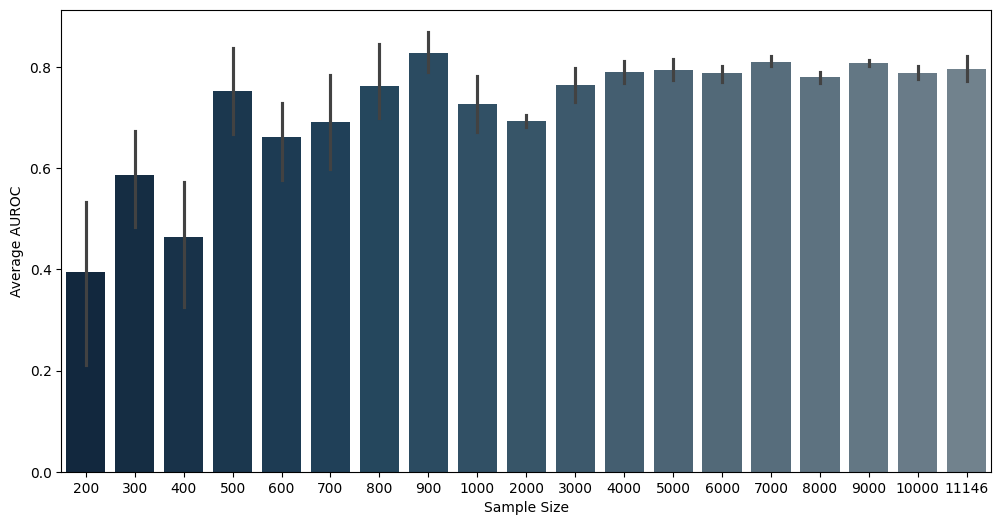

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import cmocean


plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=linePlotDf,
    x='Sample Size',
    y='AUROC Score',
    # hue='Data Window',
    palette=sns.color_palette("cmo.diff", n_colors=80),
    # height=6,
    # aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='Sample Size')
ax.set(ylabel='Average AUROC')
plt.show()
